# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import random

#%matplotlib notebook
%config Completer.use_jedi = False

# Set a seed so data is reproduceable
random.seed(42)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata)
print(study_results)

# Combine the data into a single dataset
    merged_dataset_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
merged_dataset_df.head()


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mice_count_in_file = mouse_metadata["Mouse ID"].count()
print(mice_count_in_file)

unique_mice_id_in_merge = merged_dataset_df["Mouse ID"].unique()

total_mice_in_merge = len(unique_mice_id_in_merge)
total_mice_in_merge

249


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_data_groupby = merged_dataset_df.groupby(['Mouse ID','Timepoint']) 

#print(mice_data_groupby)

duplicate_rows = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]  
#duplicate_rows

duplicate_mouse_ids = merged_dataset_df.loc[merged_dataset_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids

#Timepoint_counts

#clean_duplicates = Timepoint_counts.loc[Timepoint_counts['Timepoint'] > 1, :]

#merged_dataset_df["Mouse ID"].value_counts() # this is a series object
#any aggregation that we do it actually returns a series and not a dataframe
# univariant objects you do bar 
# if it doesn't print in the pretty data frame format, then it is a series

# mice_data_groupby["Mouse ID"].unique() # this is a series
# create mechanisms to view and clean data when starting to work with a new file 
# to cast pd.to_numeric(mice_data_groupby["Mouse ID"])
# mice_data_groupby.loc[mice_data_groupby["Mouse ID"] == "a203"]

# create a new [column]
#mice_data_groupby["Timepoint_count"] = mice_data_groupby["Timepoint"].count()
#mice_data_groupby["Timepoint_count"].value_count()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dataset_df[merged_dataset_df['Mouse ID'].isin(duplicate_mouse_ids)==True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset_df = merged_dataset_df[merged_dataset_df['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_dataset_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary_df = clean_dataset_df.groupby(clean_dataset_df['Drug Regimen'])

tumor_volume_mean = drug_regimen_summary_df['Tumor Volume (mm3)'].mean()
tumor_volume_mean

tumor_volumne_median = drug_regimen_summary_df['Tumor Volume (mm3)'].median()
tumor_volumne_median

tumor_vol_var_test = drug_regimen_summary_df['Tumor Volume (mm3)'].var()
print(tumor_vol_var_test)

tumor_vol_std_test = drug_regimen_summary_df['Tumor Volume (mm3)'].agg(np.std)
#.std .sem
print(tumor_vol_std_test)

tumor_vol_sem_test = drug_regimen_summary_df['Tumor Volume (mm3)'].agg(st.sem)
print(tumor_vol_sem_test)

# numpy way starts here
tumor_volume = clean_dataset_df['Tumor Volume (mm3)']
#display(tumor_volume)

tumor_volume_mean_s = np.mean(tumor_volume)
tumor_volume_mean_s

tumor_volume_median_s = np.median(tumor_volume)
tumor_volume_median_s

# tumor_vol_mode_s = st.mode(tumor_volume)
# tumor_vol_mode_s

tumor_vol_var_s = np.var(tumor_volume, ddof = 0)
tumor_vol_var_s

tumor_vol_std_s = np.std(tumor_volume, ddof = 0)
tumor_vol_std_s

tumor_vol_sem_s = sem(tumor_volume)
tumor_vol_sem_s

drug_series = clean_dataset_df['Drug Regimen'].unique()
drug_series

#[drug['Tumor Volume (mm3)'].mean() for drug in drug_series]

first_summary_table_df = pd.DataFrame({ #"Drug Regimen": drug_regimen_summary_df['Drug Regimen'],
                                        "Drug Reg. Mean": tumor_volume_mean,
                                        "Tumor Volume Mean np": tumor_volume_median_s,
                                        "Median Tumor Volume": tumor_volumne_median,
                                        "Tumor Volume Variance": tumor_vol_var_test,
                                        "Tumor Volume Std. Dev.": tumor_vol_std_test,
                                        "Tumor Volume Std. Err.": tumor_vol_sem_test
                                     })
first_summary_table_df

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


,Drug Reg. Mean,Tumor Volume Mean np,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,40.675741,48.933454,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,48.933454,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,48.933454,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,48.933454,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,48.933454,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,48.933454,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,48.933454,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,48.933454,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,48.933454,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_regimen_summary2_df = clean_dataset_df.groupby(clean_dataset_df['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

drug_regimen_summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64


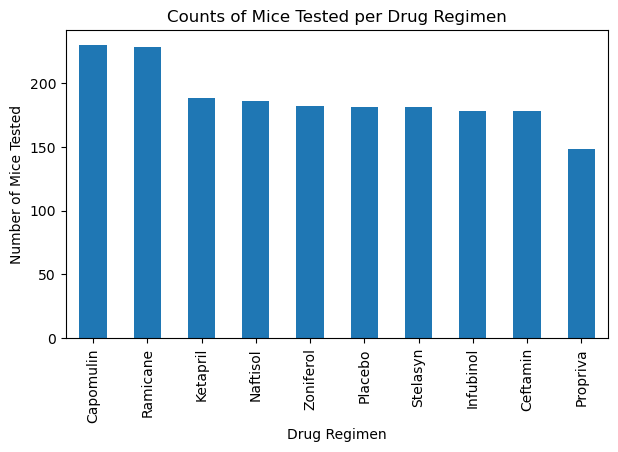

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_series = clean_dataset_df['Drug Regimen'].value_counts()
print(drug_regimen_series)

drug_regimen_bar = drug_regimen_series.plot(kind="bar", figsize=(7,4), title="Counts of Mice Tested per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
#facecolor="blue",


[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


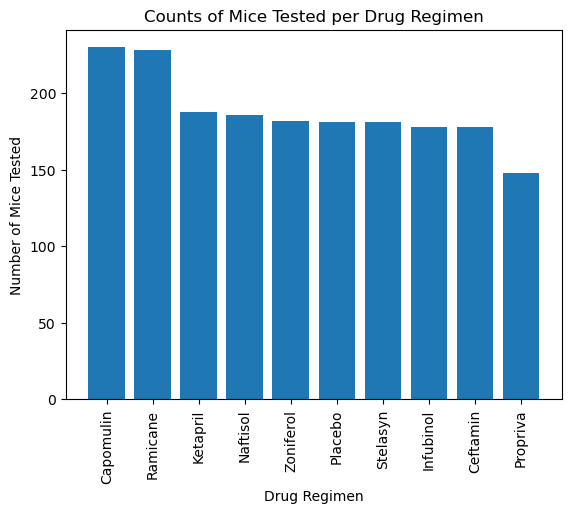

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(0,len(drug_regimen_series))
print(x_axis)

x_labels = []
for x in x_axis:
    x_labels.append(x)
    
print(x_labels)

drug_regimen_labels = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]

plt.bar(x_axis,drug_regimen_series, alpha=1)
plt.xticks(x_labels, drug_regimen_labels, rotation="90")

plt.title("Counts of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

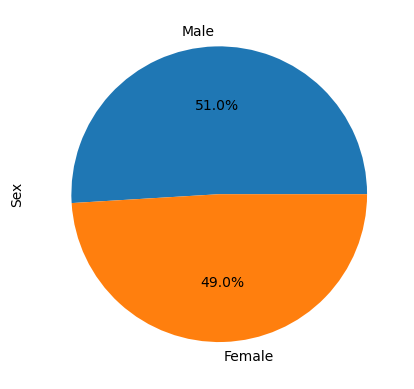

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex_series = clean_dataset_df['Sex'].value_counts()
#print(mice_sex_series)

mice_sex_series.plot(kind="pie", autopct="%1.1f%%")
plt.show()

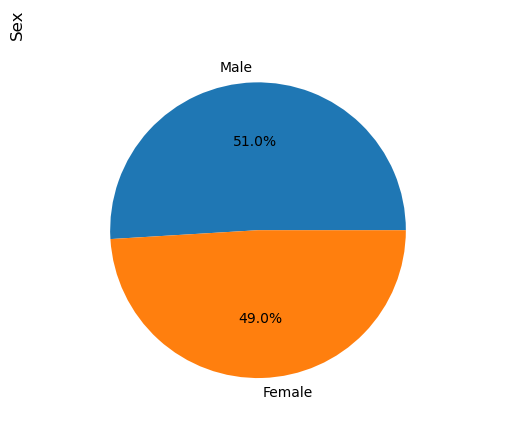

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_labels=["Male","Female"]
plt.axis("equal")
plt.pie(mice_sex_series, labels=sex_labels, autopct="%1.1f%%")
plt.title("Sex", loc="left", rotation=90) 
plt.show()

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

print(clean_dataset_df.head())

max_timepoint_df = clean_dataset_df.groupby(['Mouse ID']).max('Timepoint')
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

new_merged_df = pd.merge(max_timepoint_df, clean_dataset_df, on=['Mouse ID','Timepoint'])
new_merged_df                       


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


,Mouse ID,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen,Sex,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,a203,20,23,45,67.973419,2,Infubinol,Female,20,23,67.973419,2
1,a251,21,25,45,65.525743,1,Infubinol,Female,21,25,65.525743,1
2,a262,17,29,45,70.717621,4,Placebo,Female,17,29,70.717621,4
3,a275,20,28,45,62.999356,3,Ceftamin,Female,20,28,62.999356,3
4,a366,16,29,30,63.440686,1,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...,...,...,...,...
243,z435,12,26,10,48.710661,0,Propriva,Female,12,26,48.710661,0
244,z578,11,16,45,45.000000,0,Ramicane,Male,11,16,30.638696,0
245,z581,24,25,45,62.754451,3,Infubinol,Female,24,25,62.754451,3
246,z795,13,29,45,65.741070,3,Naftisol,Female,13,29,65.741070,3


In [85]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

drug_reg_capomulin_df = new_merged_df.loc[new_merged_df["Drug Regimen"] == "Capomulin"]
drug_reg_capomulin_df

capomulin = drug_reg_capomulin_df["Tumor Volume (mm3)_x"]
capomulin

quartiles = capomulin.quantile([0.25,.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'lower quartile: {lowerq}')
print(f'upper quartile: {upperq}')
print(f'IQR: {iqr}')

median = capomulin.median()
lower_bound = median - 1.5*iqr
upper_bound = median + 1.5*iqr
    
print(f'lower bound: {lower_bound}')
print(f'upper bound: {upper_bound}')
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
outliars = capomulin.loc[(capomulin > upper_bound ) & (capomulin < lower_bound )]


print(f"Capomulin's potential outliars: {outliars}")
    

lower quartile: 45.0
upper quartile: 46.74900552
IQR: 1.7490055199999972
lower bound: 43.270212040000004
upper bound: 48.517228599999996
Capomulin's potential outliars: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


In [98]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug_reg in treatments:
        drug_reg_series = new_merged_df.loc[new_merged_df["Drug Regimen"] == drug_reg,"Tumor Volume (mm3)_x"]
        #print(drug_reg_series.head(5))
        
        tumor_vol_data.append(drug_reg_series)

        quartiles = drug_reg_series.quantile([0.25,.5,0.75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq

        median = drug_reg_series.median()
        lower_bound = median - 1.5*iqr
        upper_bound = median + 1.5*iqr

        outliars = drug_reg_series.loc[(drug_reg_series > upper_bound ) & (drug_reg_series < lower_bound )]

        print(f"{drug_reg}'s potential outliers: {outliars}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3)_x, dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

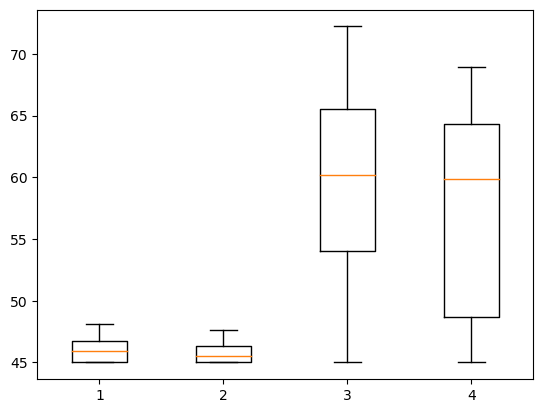

In [99]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

series = [10, 20, 50, 75]
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data)
plt.show


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#plt.scatter(x = , y = )
#plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

